## 프로그래머스 질문 태그 Crawling & WordCloud
프로그래머스 질문 게시판의 질문에 달린 태그를 통해 어떤 언어나 문제들이 많이 질문되는지를 파악해볼 수 있도록 워드 클라우드를 그린다

In [2]:
from bs4 import BeautifulSoup
import requests
import time

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
questions= []

In [12]:
for i in range(1, 30):
  res = requests.get("https://qna.programmers.co.kr/?page={}".format(i), user_agent)
  soup = BeautifulSoup(res.text, "html.parser")
  ul_tags = soup.find_all("ul", "question-tags")
  for ul in ul_tags:
    li_tags = ul.find_all("li")
    for li in li_tags:
      questions.append(li.text.strip())
  time.sleep(0.5)

In [13]:
questions[:10], len(questions)

(['python',
  'editor',
  'coding-test',
  'ubuntu',
  'vmware',
  'python',
  'django',
  'python',
  'testing',
  'python'],
 2507)

In [20]:
counter = Counter(questions)

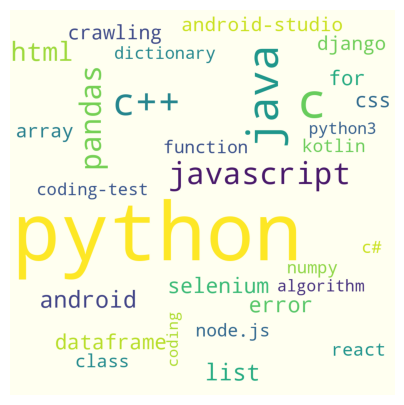

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_words=30, height=1000, width=1000, background_color='ivory')
img = wordcloud.generate_from_frequencies(counter)
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.axis('off')
plt.show()